# REPORT
## INTRODUCTION 
The analytics report will provide Apprentice Chef executives the important factors which affect the revenue stream from each customer within their first year, and the top insights to predict the success of the cross-selling promotion (Halfway There)


## REVENUE


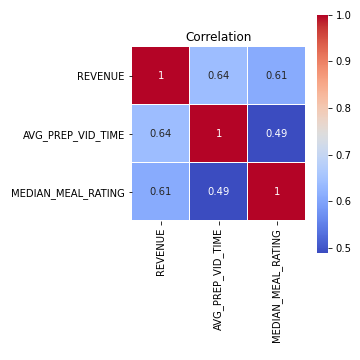

In [1]:
#NOTE- RUN THE CODE TO GET THE FIGURE (IT WAS SAVED FROM THE CODE SESSION BELOW)
# Improting Image class from PIL module  
from IPython.display import Image      # attach the image in Python

#Import the image of feature correlation with Revenue
correlation = Image('Heatmap Features.png')

#display the image of feature correlation with Revenue
display(correlation)

- Revenue Stream was predicted by using Ordinary Least Squares Regression with the Rsquare of 0.795
    - The meal preparation instruction video is the most important feature to get more revenue from the first-year customers (0.64 correlation). 
        - The tutorial needs to be detailed of the cooking process and diverse of the food that we provide. To attract customers' attention, the videos need to be informative and entertaining, the more time and effort we invest, the better way to appeal to customers' purchase behaviors.
    - Meal rating from customers is the second crucial factor which helps to get more purchases.
        - Follow- up email to ask customers to write a more thorough review of their experience. A small promotion such as 5-10% off for the next order when customer gives the public feedback will also help with the revenue stream 

## CROSS-SELL SUCCESS

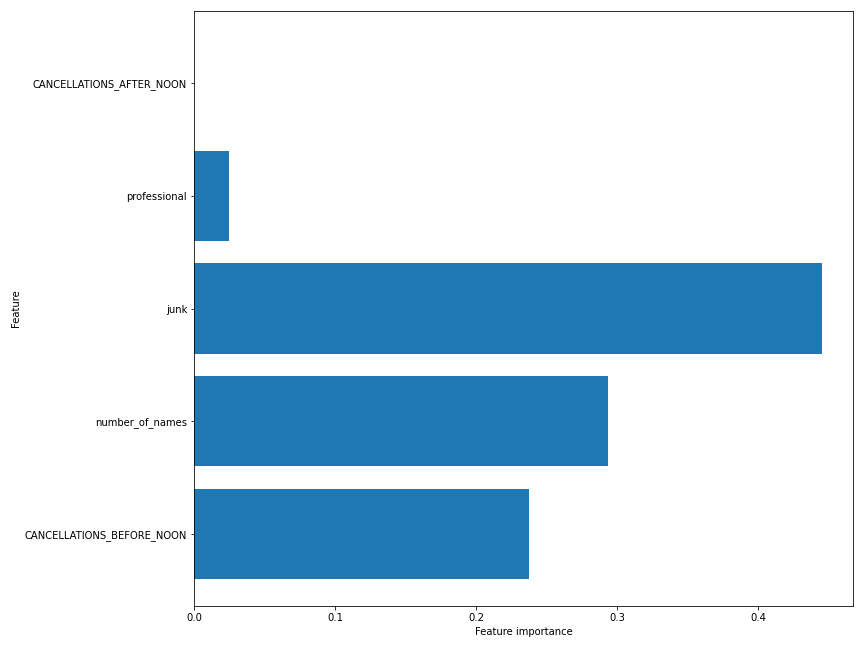

In [2]:
#NOTE- RUN THE CODE TO GET THE FIGURE (IT WAS SAVED FROM THE CODE SESSION BELOW)
#Import feature importance image
features = Image('Feature Importance.png')

#display the feature importance
display(features)


- The success of Cross-sell promotion was analyzed by the Decision Tree model with an AUC score of 0.732. 
- The successful promotion will be determined by the quality of information that customers used to register: the real email address and the name contains at least contain 2 components (first & last name). 
    - Key insight.: Improve the registration process:
        - First and last name information is required section to register
        - Using description on email section to encourage the customer to use their most regularly checked emails for order and shipping information
        - Follow up the registration process when receiving the notification for new registers
        
## CONCLUSION
- Video is the most effective tool and helps companies make more money faster
- Quality of customers' information will help the promotion become successful

# CODE SESSION

In [3]:
# ALL needed libraries
import pandas as pd                                   # data science essentials
import matplotlib.pyplot as plt                       # data visualization
import seaborn as sns                                 # enhanced data visualization
import numpy as np                                    # numpy for math
from sklearn.model_selection import train_test_split  # train-test split
import statsmodels.formula.api as smf                 # statsmodel


# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression     # linear regression (scikit-learn)
import sklearn.linear_model                           # linear models

#CART model packages
from sklearn.tree import DecisionTreeClassifier       # classification trees
from sklearn.tree import export_graphviz              # exports graphics
from six import StringIO                              # saves objects in memory
from IPython.display import Image                     # displays on frontend
import pydotplus                                      # interprets dot objects
from sklearn.metrics import confusion_matrix          # confusion matrix
from sklearn.metrics import roc_auc_score             # auc score



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
df = pd.read_excel(io=file)

In [4]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))
        

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

## FEATURE ENGINEER


In [5]:
#Dummy variable
df['HAS_CLASS']                = 0  
df['HAS_PHOTOS']               = 0
df['HAS_TOTAL_MEALS_ORDERED']  = 0

for index, value in df.iterrows():
    # TOTAL MASTER CLASS   
    if df.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        df.loc[index, 'HAS_CLASS'] = 1

    # TOTAL_PHOTOS_VIEWED
    if df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        df.loc[index, 'HAS_PHOTOS'] = 1
    
    # TOTAL_MEAL_ORDERED
    if df.loc[index, 'TOTAL_MEALS_ORDERED'] >= 20:
        df.loc[index, 'HAS_TOTAL_MEALS_ORDERED'] = 1

In [6]:
# log transforming REVENUE and saving it to the dataset
df['log_REVENUE'] = np.log10(df['REVENUE'])

#log transformation
df['log_TOTAL_MEALS_ORDERED'] = np.log10(df['TOTAL_MEALS_ORDERED'])

#Log transformation
df['log_LARGEST_ORDER_SIZE'] = np.log10(df['LARGEST_ORDER_SIZE'])

#Log transformation
df['log_MEDIAN_MEAL_RATING'] = np.log10(df['MEDIAN_MEAL_RATING'])

#Log transformation
df['log_AVG_CLICKS_PER_VISIT'] = np.log10(df['AVG_CLICKS_PER_VISIT'])

#log transformation
df['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(df['AVG_TIME_PER_SITE_VISIT'])

#Log transformation
df['log_UNIQUE_MEALS_PURCH'] = np.log10(df['UNIQUE_MEALS_PURCH'])

#Log transformations
df['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(df['CONTACTS_W_CUSTOMER_SERVICE'])

#Log transformation
df['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(df['PRODUCT_CATEGORIES_VIEWED'])

#Log transformation
df['log_PC_LOGINS'] = np.log10(df['PC_LOGINS'])


In [7]:
# STEP 1: splitting emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in df.iterrows():
    
    # splitting email domain at '@'
    split_email = df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# STEP 2: concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['user_name','email_domain']


# concatenating personal_email_domain with df DataFrame
df = pd.concat([df, email_df['email_domain']],
                        axis = 1)


# email domain types (based on the case)
personal            = [     '@gmail.com', '@protonmail.com','@yahoo.com']

junk                = [     '@msn.com'          ,          
                            '@aol.com'          ,          
                            '@passport.com'     ,         
                            '@hotmail.com'      ,         
                            '@live.com'         ,         
                            '@me.com']

professional  =   [         '@amex.com',             
                            '@merck.com'       ,   
                            '@cocacola.com'    ,       
                            '@jnj.com'         ,     
                            '@mcdonalds.com'   ,     
                            '@nike.com'        ,     
                            '@apple.com'       ,     
                            '@dupont.com'      ,     
                            '@ge.org'          ,     
                            '@ibm.com'         ,    
                            '@chevron.com'     ,     
                            '@microsoft.com'   ,    
                            '@unitedhealth.com',   
                            '@travelers.com'   ,    
                            '@exxon.com'       ,     
                            '@boeing.com'      ,      
                            '@verizon.com'     ,      
                            '@mmm.com'         ,       
                            '@caterpillar.com' ,     
                            '@pg.com'          ,       
                            '@walmart.com'     ,       
                            '@disney.com'      ,        
                            '@visa.com'        ,       
                            '@pfizer.com'      ,       
                            '@jpmorgan.com'    ,      
                            '@goldmansacs.com' ,      
                            '@unitedtech.com'  ,      
                            '@cisco.com'       ,     
                            '@intel.com'       ,       
                            '@homedepot.com'   ]


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in df['email_domain']:
        if '@' + domain in personal:
            placeholder_lst.append('personal')
                  
        elif '@' + domain in junk:
            placeholder_lst.append('junk')
        
        elif '@' + domain in professional:
            placeholder_lst.append('professional')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
df['domain_group'] = pd.Series(placeholder_lst)

#Prepare the data (code it into number)
# one hot encoding categorical variables
one_hot_domain       = pd.get_dummies(df['domain_group'])

# dropping categorical variables after they've been encoded
df = df.drop('domain_group', axis = 1)

# joining codings together- appending new data into the dataset
df = df.join([one_hot_domain])


# saving new columns
new_columns = df.columns

In [8]:
#Numerical Binning 
df['bin_rating'] = pd.cut(df['MEDIAN_MEAL_RATING'], bins=[0,1,2,3,4,5],\
                   labels=["Very_Bad","Bad", "OK", "Good", "Very_Good"])

# Prepare the data (code it into number)
# One hot encoding categorical variables
one_hot_bin_rating     = pd.get_dummies(df['bin_rating'])

# dropping categorical variables after they've been encoded
df = df.drop('bin_rating', axis = 1)

# joining codings together- appending new data into the dataset
df = df.join([one_hot_bin_rating])

# saving new columns
new_columns = df.columns

In [9]:
# calling text_split_feature
text_split_feature('NAME', df, sep='')


In [10]:
#DROP OBJECT VARIABLE
df = df.drop('NAME', axis = 1)
df = df.drop('EMAIL', axis = 1)
df = df.drop('FIRST_NAME', axis = 1)
df = df.drop('FAMILY_NAME', axis =1)
df = df.drop('email_domain', axis =1)



In [11]:
df.to_excel('Feature_engineered_data.xlsx',
                           index = False)

## LINEAR REGRESSION

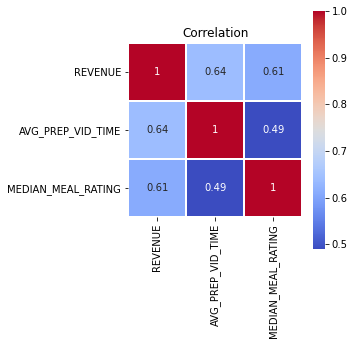

In [13]:
# correlation heatmap

# setting figure size
fig, ax = plt.subplots(figsize=(5,5))


# limiting the size of the correlation matrix
df_correlation = df_corr.loc[ ['REVENUE', 'AVG_PREP_VID_TIME','MEDIAN_MEAL_RATING'],
                              ['REVENUE', 'AVG_PREP_VID_TIME','MEDIAN_MEAL_RATING']]


# visualizing the correlation matrix
sns.heatmap(df_correlation,
            cmap       = 'coolwarm',
            square     = True,
            annot      = True,
            linecolor  = 'white',
            linewidths = 0.5,
            cbar       = True)


# title the plot
plt.title("""Correlation""")

#fixing layout
plt.tight_layout()

# saving and displaying the correlation matrix
plt.savefig('Heatmap Features.png', orientation ='landscape')

In [14]:
#FULL DATA
df_data_reg   = df.drop(['REVENUE',
                    'log_REVENUE'], axis = 1)

# preparing response variables
df_target_reg     = df.loc[ : , 'REVENUE']
log_df_target_reg = df.loc[ : , 'log_REVENUE']


# preparing training and testing sets 
x_train_LOG, x_test_LOG, y_train_LOG, y_test_LOG = train_test_split(
                                                                    df_data_reg,
                                                                    log_df_target_reg,
                                                                    test_size = 0.25,
                                                                    random_state = 219)
# INSTANTIATING a model object
lr = LinearRegression(fit_intercept=False, normalize=True, copy_X=False, n_jobs=10)


# FITTING to the training data
lr_fit = lr.fit(x_train_LOG, y_train_LOG)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_LOG)

#Save in variables
lr_train_score = lr.score(x_train_LOG, y_train_LOG).round(3) # using R-square
lr_test_score  = lr.score(x_test_LOG, y_test_LOG).round(3)   # using R-square
lr_test_gap    = abs(lr_train_score - lr_test_score).round(3)

# SCORING the results
print('OLS Training Score :', lr_train_score)  # using R-square
print('OLS Testing Score  :', lr_test_score) # using R-square

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', lr_test_gap)

OLS Training Score : 0.796
OLS Testing Score  : 0.795
OLS Train-Test Gap : 0.001


## DECISION TREE  

In [15]:
#create the dictionary 

feature_dict = {
 
 # significant variables only
    
'tree'         :  [  'CANCELLATIONS_BEFORE_NOON' ,  
                     'number_of_names' , 
                     'junk' ,
                     'professional' , 
                     'CANCELLATIONS_AFTER_NOON'],
} 

In [16]:
#Set df_data and df_target for logit_sig_2
df_data_tree   =  df.loc[ : , feature_dict['tree']]
df_target_tree =  df.loc[ : , 'CROSS_SELL_SUCCESS']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
                                                    df_data_tree,
                                                    df_target_tree,
                                                    random_state = 219,
                                                    test_size    = 0.25,
                                                    stratify     = df_target_tree)

#classification tree tuned
tree_tuned      = DecisionTreeClassifier(max_depth=3, min_samples_leaf=18, random_state=219)

tree_tuned_fit  = tree_tuned.fit(x_train, y_train)

tree_tuned_pred = tree_tuned.predict(x_test)


# saving scoring data for future use
tree_train_score = tree_tuned_fit.score(x_train, y_train).round(3) # accuracy
tree_test_score  = tree_tuned_fit.score(x_test, y_test).round(3)   # accuracy


# saving the AUC score and gap of training_testing 
tree_auc = roc_auc_score(y_true  = y_test,
                         y_score = tree_tuned_pred).round(3)       # auc
tree_tuned_gap = abs(tree_train_score - tree_test_score).round(3)

# SCORING the results
print(' Training ACCURACY:', tree_train_score)
print(' Testing  ACCURACY:', tree_test_score)
print(' Tuned AUC Score  :', tree_auc)
print(' Tree Train-Test Gap  :', tree_tuned_gap)


 Training ACCURACY: 0.74
 Testing  ACCURACY: 0.776
 Tuned AUC Score  : 0.732
 Tree Train-Test Gap  : 0.036


<ipython-input-4-979f6e4ece78>:46: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


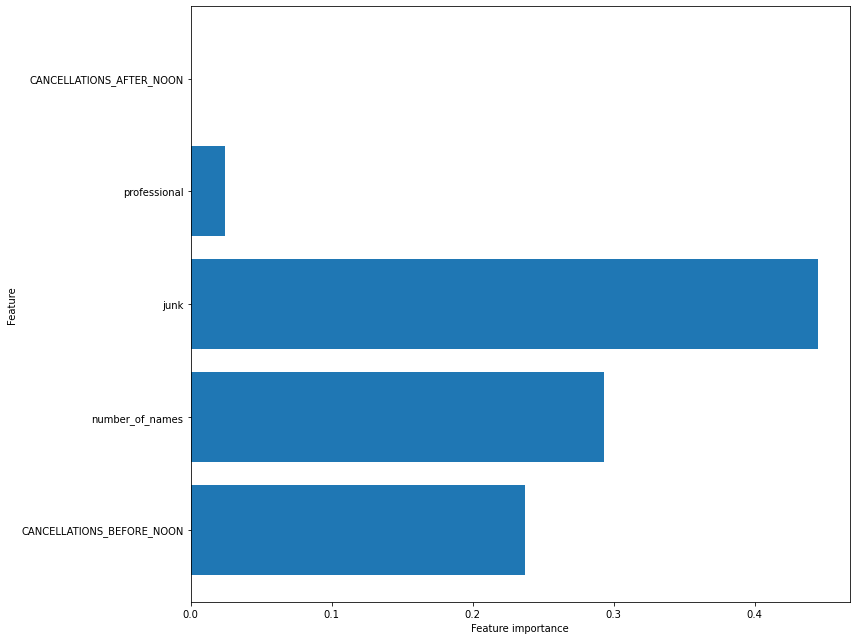

In [17]:
# plotting feature importance
plot_feature_importances(tree_tuned_fit,
                         train  = x_train,
                         export = False)

plt.tight_layout()

# NEW! Saving a figure as an image
plt.savefig(fname = 'Feature Importance.png')

## FINAL RESULT

In [18]:
# creating a dictionary for final model result
model_performance = {
    
    'Model Type'     : ['Ordinary Least Squares Regression', 'Tuned Decision Tree'],
           
    'Training'       : [lr_train_score, tree_train_score],
           
    'Testing'        : [lr_test_score, tree_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, tree_tuned_gap],
                    
    'AUC score'      : [0, tree_auc]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

# sending model results to Excel
model_performance.to_excel('model_performance.xlsx',
                           index = False)

pd.read_excel('model_performance.xlsx')

,Model Type,Training,Testing,Train-Test Gap,AUC score
0,Ordinary Least Squares Regression,0.796,0.795,0.001,0.000
1,Tuned Decision Tree,0.740,0.776,0.036,0.732
